### Импорт необходимых модулей

In [3]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline     
import pandas as pd             
import seaborn as sns           
import sklearn   

### Название

### Информация о датасете

### Описание

In [218]:
path = 'codon_usage.csv'
raw_data = pd.read_csv(path, low_memory=False)

### Размерность

In [9]:
raw_data.shape

(13028, 69)

Датасет содержит **13028** строк и **69** столбцов.

Начало таблицы

In [11]:
raw_data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [26]:
raw_data.index

RangeIndex(start=0, stop=13028, step=1)

### Обзор столбцов

In [13]:
raw_data.columns

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')

#### Найдём уникальные значения в толбце Kingdom

In [33]:
unique_values = raw_data.Kingdom.unique()
print(f"Уникальные значения в столбце Kingdom: {unique_values}\nКоличество уникальных значений: {unique_values.size}")

Уникальные значения в столбце Kingdom: ['vrl' 'arc' 'bct' 'phg' 'plm' 'pln' 'inv' 'vrt' 'mam' 'rod' 'pri']
Количество уникальных значений: 11


**Итого**: 11 классов для задачи классификации

### Описание столбцов
- **Kingdom** - царство, код из трёх букв вида: xxx (arc - археи, bct - бактерии, plm - плазмиды, inv - беспозвоночные, mam - млекопитающие, pln - растения, pri - приматы, rod - грызуны, vrt - позвоночные, phg - бактериофаги, vrl - вирусы)
- **DNAType** - тип ДНК, обозначается целым числом для геномного состава вида: 0 - геномный, 1 - митохондриальный, 2 - хлоропласт, 3 - цианелла, 4 - пластида, 5 - нуклеоморф, 6 - вторичный эндосимбионт, 7 - хромопласт, 8 - лейкопласт, 9 - значение недоступно, 10 - пропластид, 11 - апикопласт и 12 - кинетопласт.
- **SpeciesID** - целое число, уникальный идентификатор вида
- **Ncodons** - число кодонов представляет собой алгебраическую сумму чисел, перечисленных для различных кодонов. Частоты кодонов нормализованы к общему количеству кодонов, поэтому количество появлений, разделенное на «Ncodons», представляет собой частоты кодонов, перечисленные в файле данных. 
- **SpeciesName** - название вида представлено в виде строк. Это описательная метка для интерпретации данных. 
- **UUU, UUC, UUA ... UGA** - частоты кодонов, представлены числами с плавающей запятой (точность 5 знаков)

Требуется определить принадлежность вида к определённому царству по частоте встречаемости кодонов в его ДНК.

In [186]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

Тип данных для столбцов UUU и UUC был определён неверно, выясняем причину (ищем нечисловые значения)

In [214]:
pd.isnull((raw_data[["UUU", "UUC"]].apply(pd.to_numeric, errors = 'coerce'))).sum()

UUU    2
UUC    1
dtype: int64

Находим и заменяем нестандартные данные

In [219]:
def invalid_to_nan(columnIndex):
    for index, value in raw_data[columnIndex].items():
        try:
            float(value)            
        except ValueError:
            print(f"column: {columnIndex} index: {index}, value: {value}")
            raw_data.loc[index, columnIndex] = np.nan

In [220]:
invalid_to_nan("UUU")
invalid_to_nan("UUC")

column: UUU index: 486, value: non-B hepatitis virus
column: UUU index: 5063, value: 12;I
column: UUC index: 5063, value: -


In [223]:
raw_data['UUU'] = raw_data['UUU'].astype('float64')
raw_data['UUC'] = raw_data['UUC'].astype('float64')

Результат преобразований

In [224]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13026 non-null  float64
 6   UUC          13027 non-null  float64
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

Удаляем пропущенные данные

In [225]:
raw_data.dropna(inplace=True)

Анализ классов

In [226]:
raw_data['Kingdom'].value_counts()

bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

Классы несбалансированны

Визуализация

<AxesSubplot:xlabel='Kingdom', ylabel='count'>

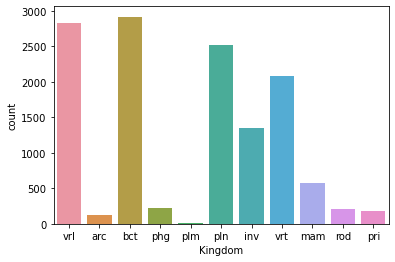

In [232]:
sns.countplot(x = raw_data['Kingdom'])